In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

from sklearn import cluster
from sklearn.metrics import silhouette_score
from sklearn.neighbors import kneighbors_graph

from bokeh.plotting import figure, show, output_file


In [2]:
%matplotlib inline

In [3]:
# plot html file
output_file("hw07.html", title = "hw07")

cf = pd.read_csv("WholesaleCustomersData.csv", header = 0)


In [4]:
if True:
    print cf.columns
    print len(cf)
    print cf.head()
    print cf.info()
    print cf.isnull().sum()
    print cf.describe()


Index([u'Channel', u'Region', u'Fresh', u'Milk', u'Grocery', u'Frozen',
       u'Detergents_Paper', u'Delicassen'],
      dtype='object')
440
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicas

In [5]:
# normalize the data
scf = (cf - cf.min()) / (cf.max() - cf.min())


In [6]:
xvals = np.arange(2, 15)
yvals = []


In [7]:
if True:
    for i in xvals:
        scf_km = cluster.KMeans(i)
        scf_km.fit(scf)
        labels = scf_km.labels_
        score = silhouette_score(scf, labels, metric = 'euclidean')
        yvals.append(score)
    p = figure(title = "scores")

    p.line(xvals, yvals)
    show(p)


/Users/logan/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [8]:
if True:
    scfm = cluster.KMeans(4)
    scfm.fit(scf)

    centers = scfm.cluster_centers_

    print centers

    p = figure(title = "Clusters", tools = "")

    p.circle(x = centers[ : , 2], y = centers[ : , 3],
            alpha = 0.4, color = "green", size = 100)

    show(p)


[[ -3.88578059e-16   1.60919540e-01   1.11427777e-01   4.50855547e-02
    4.46448095e-02   6.48347347e-02   1.95219850e-02   2.42966543e-02]
 [  4.99600361e-16   1.00000000e+00   1.23720906e-01   4.67298591e-02
    4.18609634e-02   5.96920070e-02   1.91966114e-02   3.16079341e-02]
 [  1.00000000e+00   1.00000000e+00   8.76386985e-02   1.48768562e-01
    1.71926334e-01   2.44592729e-02   1.68926075e-01   3.80310706e-02]
 [  1.00000000e+00   2.56756757e-01   5.59094691e-02   1.34946351e-01
    1.87192247e-01   3.32529624e-02   2.03734819e-01   3.22052340e-02]]


/Users/logan/anaconda/lib/python2.7/site-packages/sklearn/manifold/spectral_embedding_.py:215: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/logan/anaconda/lib/python2.7/site-packages/sklearn/cluster/hierarchical.py:205: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)
/Users/logan/anaconda/lib/python2.7/site-packages/sklearn/cluster/hierarchical.py:440: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)


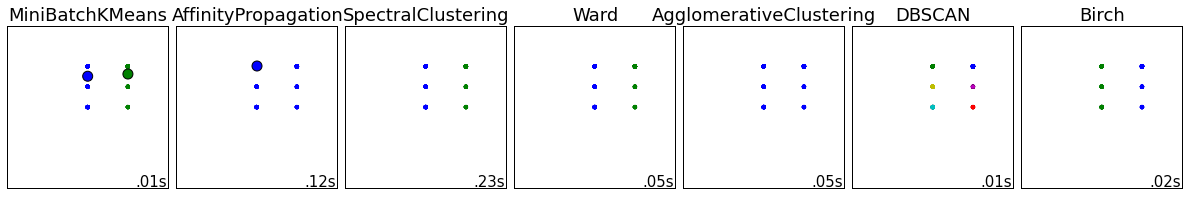

In [9]:
if True:
    colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
    colors = np.hstack([colors] * 20)

    clustering_names = [
        'MiniBatchKMeans', 'AffinityPropagation',
        'SpectralClustering', 'Ward', 'AgglomerativeClustering',
        'DBSCAN', 'Birch']

    plt.figure(figsize = (len(clustering_names) * 2 + 3, 9.5))
    plt.subplots_adjust(left = .02, right = .98, bottom = .001, top = .96, wspace = .05,
                        hspace = .01)

    plot_num = 1

    X = scf

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(X, n_neighbors = 10, include_self = False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)


    two_means = cluster.MiniBatchKMeans(n_clusters = 2)

    ward = cluster.AgglomerativeClustering(n_clusters = 2, linkage = 'ward',
                                       connectivity = connectivity)

    spectral = cluster.SpectralClustering(n_clusters = 2,
                                        eigen_solver = 'arpack',
                                        affinity = "nearest_neighbors")

    dbscan = cluster.DBSCAN(eps=.2)

    affinity_propagation = cluster.AffinityPropagation(damping = .9,
                                                   preference = -200)

    average_linkage = cluster.AgglomerativeClustering(
        linkage = "average", affinity = "cityblock", n_clusters = 2,
        connectivity = connectivity)

    birch = cluster.Birch(n_clusters = 2)

    clustering_algorithms = [
        two_means, affinity_propagation, spectral, ward, average_linkage,
        dbscan, birch]

    for name, algorithm in zip(clustering_names, clustering_algorithms):
        # predict cluster memberships
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        # plot
        plt.subplot(4, len(clustering_algorithms), plot_num)
        plt.title(name, size = 18)
        plt.scatter(X[X.columns[0]], X[X.columns[1]], color = colors[y_pred].tolist(), s = 10)

        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[ : len(centers)]
            plt.scatter(centers[ : , 0], centers[ : , 1], s = 100, c = center_colors)
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                transform = plt.gca().transAxes, size = 15,
                horizontalalignment = 'right')
        plot_num += 1

    plt.show()


/Users/logan/anaconda/lib/python2.7/site-packages/sklearn/cluster/hierarchical.py:205: UserWarning: the number of connected components of the connectivity matrix is 3 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)
/Users/logan/anaconda/lib/python2.7/site-packages/sklearn/cluster/hierarchical.py:440: UserWarning: the number of connected components of the connectivity matrix is 3 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)


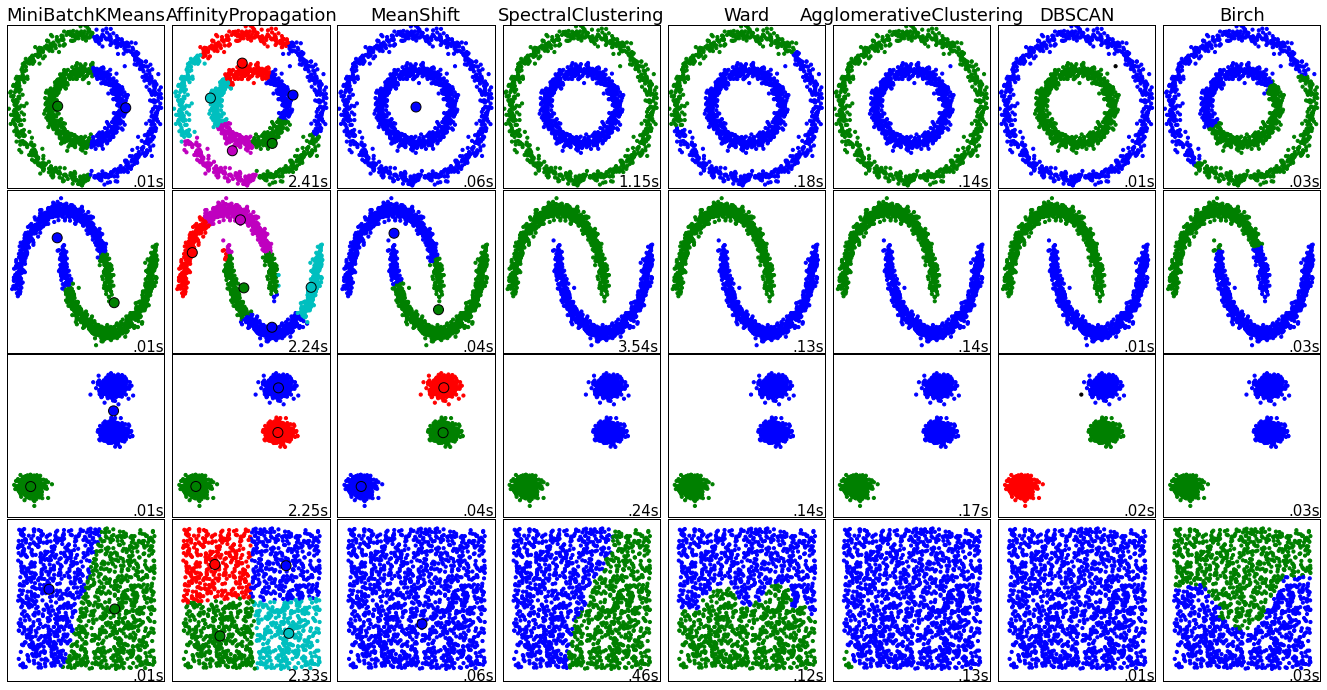

In [12]:
if True:

    from sklearn.preprocessing import StandardScaler
    from sklearn import datasets

    np.random.seed(0)

    # Generate datasets. We choose the size big enough to see the scalability
    # of the algorithms, but not too big to avoid too long running times
    n_samples = 1500
    noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
    noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
    blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
    no_structure = np.random.rand(n_samples, 2), None

    colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
    colors = np.hstack([colors] * 20)

    clustering_names = [
        'MiniBatchKMeans', 'AffinityPropagation', 'MeanShift',
        'SpectralClustering', 'Ward', 'AgglomerativeClustering',
        'DBSCAN', 'Birch']

    plt.figure(figsize=(len(clustering_names) * 2 + 3, 9.5))
    plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                        hspace=.01)

    plot_num = 1

    datasets = [noisy_circles, noisy_moons, blobs, no_structure]
    for i_dataset, dataset in enumerate(datasets):
        X, y = dataset
        # normalize dataset for easier parameter selection
        X = StandardScaler().fit_transform(X)

        # estimate bandwidth for mean shift
        bandwidth = cluster.estimate_bandwidth(X, quantile=0.3)

        # connectivity matrix for structured Ward
        connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
        # make connectivity symmetric
        connectivity = 0.5 * (connectivity + connectivity.T)

        # create clustering estimators
        ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
        two_means = cluster.MiniBatchKMeans(n_clusters=2)
        ward = cluster.AgglomerativeClustering(n_clusters=2, linkage='ward',
                                               connectivity = connectivity)
        spectral = cluster.SpectralClustering(n_clusters=2,
                                            eigen_solver='arpack',
                                            affinity="nearest_neighbors")
        dbscan = cluster.DBSCAN(eps=.2)
        affinity_propagation = cluster.AffinityPropagation(damping=.9,
                                                       preference=-200)

        average_linkage = cluster.AgglomerativeClustering(
            linkage="average", affinity="cityblock", n_clusters=2,
            connectivity=connectivity)

        birch = cluster.Birch(n_clusters=2)
        clustering_algorithms = [
            two_means, affinity_propagation, ms, spectral, ward, average_linkage,
            dbscan, birch]

        for name, algorithm in zip(clustering_names, clustering_algorithms):
            # predict cluster memberships
            t0 = time.time()
            algorithm.fit(X)
            t1 = time.time()
            if hasattr(algorithm, 'labels_'):
                y_pred = algorithm.labels_.astype(np.int)
            else:
                y_pred = algorithm.predict(X)

            # plot
            plt.subplot(4, len(clustering_algorithms), plot_num)
            if i_dataset == 0:
                plt.title(name, size=18)
            plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

            if hasattr(algorithm, 'cluster_centers_'):
                centers = algorithm.cluster_centers_
                center_colors = colors[:len(centers)]
                plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
            plt.xlim(-2, 2)
            plt.ylim(-2, 2)
            plt.xticks(())
            plt.yticks(())
            plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                    transform=plt.gca().transAxes, size=15,
                    horizontalalignment='right')
            plot_num += 1

    plt.show()
